<a href="https://colab.research.google.com/github/Brilliyandddd/PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 2

1. Agung Afrizal Daffa (2141720110)
2. Brilliyand Noval Herdana Putra (2141720104)
3. Muhammad Islahuddin (2141720268)

# Prepare

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum

## Nomor 2

In [ ]:
#Nomor 2

# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

## Nomor 3

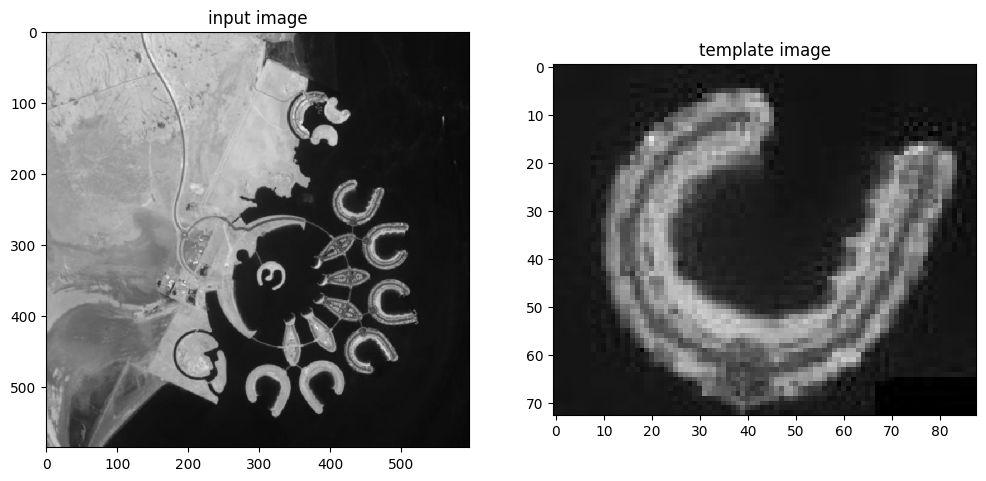

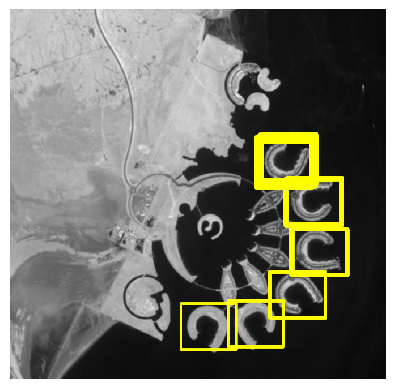

In [22]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.5)
    ax.add_patch(rect)
plt.show()

## Nomor 4

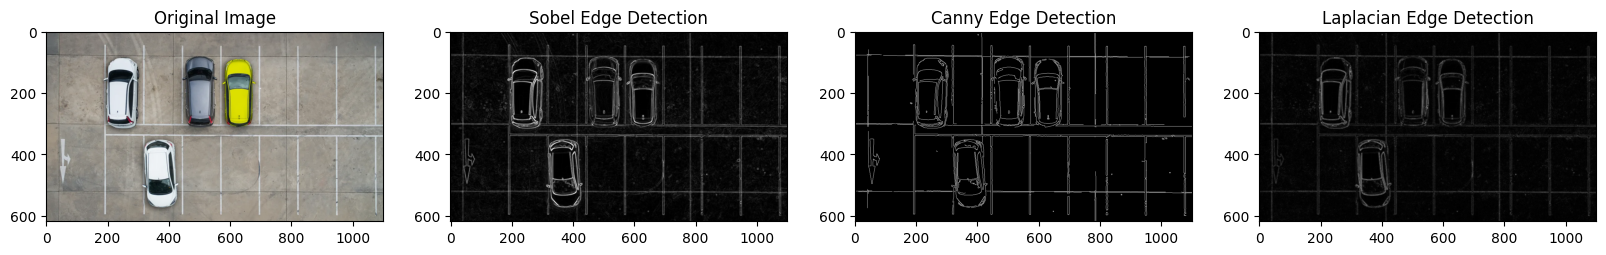

In [26]:
img0 = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

f, axarr = plt.subplots(1, 4, figsize=(20, 5))

axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')

axarr[3].imshow(img_laplacian, cmap='gray')
axarr[3].set_title('Laplacian Edge Detection')

plt.show()

## Nomor 5

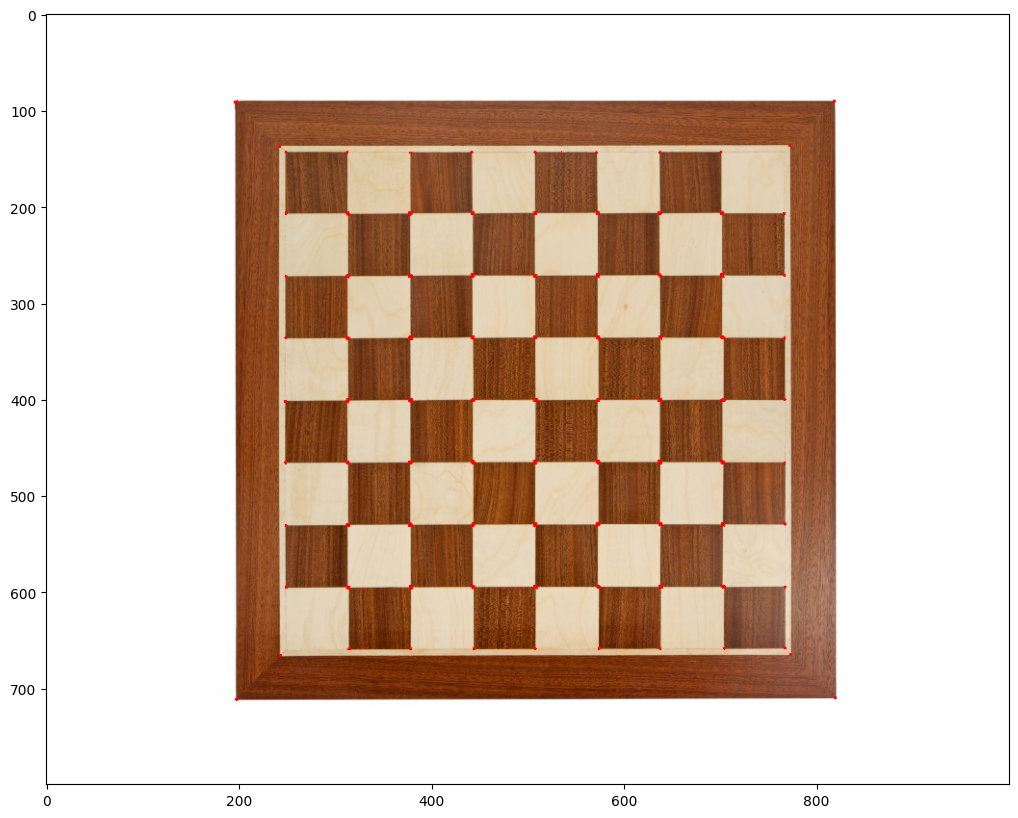

In [24]:
# Nomor 5 (a)

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

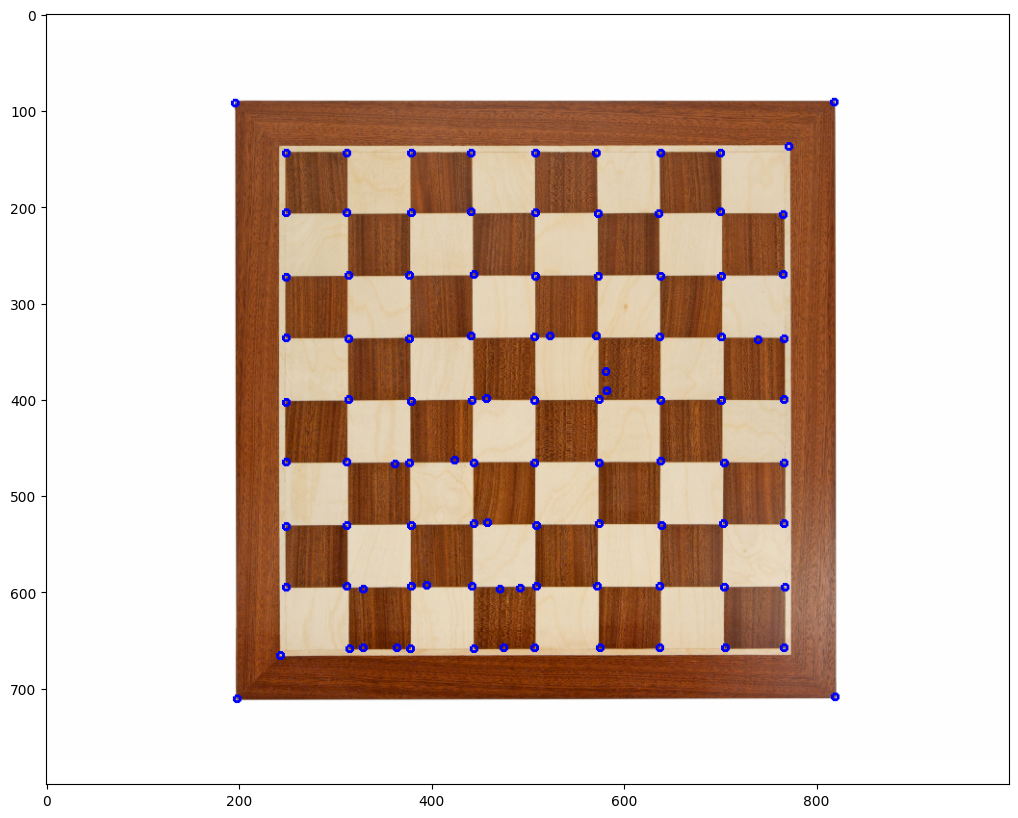

In [25]:
# Nomor 5 (b)
input_img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

## Nomor 6

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

## Nomor 7

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/resources/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# E. Pengayaan Materi KTP

In [12]:
import cv2
import os

In [14]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Week11/KTP/"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

In [15]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

In [16]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

160.0 (636, 996)


In [17]:
erode = cv2.erode(bw.copy(),
cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

In [ ]:
# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(),
cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
 x, y, w, h = cv2.boundingRect(cnt)
 ras = format(w / h, '.2f')
 if h >= 40 and w >= 10 and float(ras) <= 1:
  cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0,
255), thickness=1)
 print("+ x={}, y={}, w={}, h={}, rasio={}".format(x,
y, w, h, ras))

# Tugas Praktikum

## Kelompok 2
## KTP Galang Raka Bengkulu

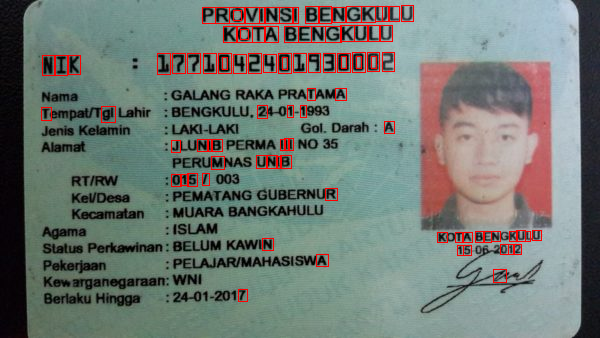

In [33]:
ktp = cv.imread("/content/drive/MyDrive/PCVK/Week11/KTP/ktp1.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)


cv2_imshow(ktp)